In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout, Concatenate

from tensorflow.keras.applications import ResNet101

In [2]:
(mnist_attributes_train, mnist_labels_train), (mnist_attributes_test, mnist_labels_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
mnist_attributes_train.shape, mnist_labels_train.shape

((60000, 28, 28), (60000,))

In [4]:
mnist_attributes_train = tf.expand_dims(mnist_attributes_train, -1).numpy()
mnist_attributes_test = tf.expand_dims(mnist_attributes_test, -1).numpy()

In [5]:
INPUT_SHAPE = mnist_attributes_train.shape[1:]
NUM_CLASSES = len(set(mnist_labels_train))

In [6]:
tf.keras.backend.clear_session()

In [7]:
model = Sequential([
    Input(INPUT_SHAPE),
    Conv2D(32, 3, strides= 2, padding = "same", activation='relu'),
    Conv2D(32, 3, padding = "same", activation='relu'),
    MaxPool2D(),
    Conv2D(16, 3, padding = "same", strides= 2, activation='relu'),
    Conv2D(16, 3, padding = "same", activation='relu'),

    Flatten(),
    Dense(16, activation = "relu"),
    Dropout(0.05),
    Dense(NUM_CLASSES, activation = "softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                        

In [9]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
history = model.fit(mnist_attributes_train,  mnist_labels_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 17s 5ms/step - loss: 0.3747 - accuracy: 0.8904 - val_loss: 0.0891 - val_accuracy: 0.9743
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1119 - accuracy: 0.9669 - val_loss: 0.0747 - val_accuracy: 0.9783
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.0589 - val_accuracy: 0.9832
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 0.0650 - val_accuracy: 0.9815
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.0508 - val_accuracy: 0.9860
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0610 - val_accuracy: 0.9842
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0465 - val_accuracy

In [11]:
model.evaluate(mnist_attributes_test,  mnist_labels_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0541 - accuracy: 0.9851


[0.05412285774946213, 0.9850999712944031]

In [12]:
model.save_weights("model.h5")

In [13]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 32])

In [20]:
input = Input((20, 20, 32))

In [45]:
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(input)
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)

long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)

concat = Concatenate()([long_path, x])

x =  Conv2D(32, (3, 3), activation = "relu")(concat)


In [46]:
x

<KerasTensor: shape=(None, 18, 18, 32) dtype=float32 (created by layer 'conv2d_43')>

In [47]:
resnet_block = Model(inputs = [input], outputs = [x])

In [48]:
resnet_block.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 20, 20, 32)]         0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 20, 20, 32)           9248      ['input_3[0][0]']             
                                                                                                  
 conv2d_40 (Conv2D)          (None, 20, 20, 32)           9248      ['conv2d_39[0][0]']           
                                                                                                  
 conv2d_41 (Conv2D)          (None, 20, 20, 32)           9248      ['conv2d_40[0][0]']           
                                                                                              

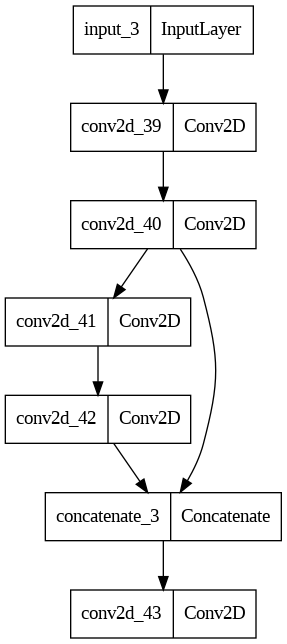

In [50]:
tf.keras.utils.plot_model(resnet_block)

In [59]:
x = Conv2D(32, (1, 1))(input)

In [60]:
one_by_one_conv = Model(inputs = [input], outputs = [x])

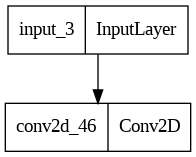

In [61]:
tf.keras.utils.plot_model(one_by_one_conv)

In [62]:
one_by_one_conv.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 20, 32)]      0         
                                                                 
 conv2d_46 (Conv2D)          (None, 20, 20, 32)        1056      
                                                                 
Total params: 1056 (4.12 KB)
Trainable params: 1056 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
resnet = ResNet101(weights = "imagenet", include_top = False)

171446536/171446536 [==============================] - 1s 0us/step


In [66]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

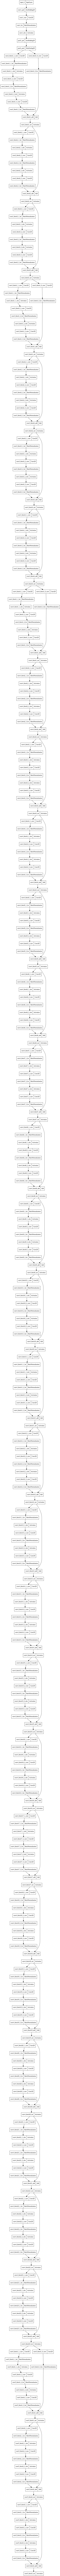

In [71]:
tf.keras.utils.plot_model(resnet)

In [72]:
!pip install keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.9 MB/s eta 0:00:00


In [73]:
import keras_cv

Using TensorFlow backend


In [74]:
keras_cv.models.ResNet101V2Backbone()

100%|██████████| 872/872 [00:00<00:00, 1.29MB/s]


In [76]:
classifier = keras_cv.models.ImageClassifier(backbone = keras_cv.models.ResNet101V2Backbone(), num_classes = NUM_CLASSES)